In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [204]:
customer=pd.read_csv('Customer Acqusition.csv')
repayment=pd.read_csv('Repayment.csv')
spend=pd.read_csv('Spend.csv')

In [205]:
customer.Age.mean()

46.49

In [206]:
customer.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [207]:
repayment.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [208]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [209]:
customer.isnull().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [210]:
repayment.isnull().sum()

SL No:          24
Customer        23
Month           23
Amount          23
Unnamed: 4    1523
dtype: int64

In [211]:
repayment.drop(columns=['Unnamed: 4','SL No:'],inplace=True)

In [212]:
repayment.head()

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88


In [213]:
repayment.dropna(inplace=True)

In [214]:
repayment.shape

(1500, 3)

In [215]:
spend.isnull().sum()

Sl No:      0
Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [216]:
spend.drop(columns='Sl No:', inplace=True)

In [217]:
spend.head()

,Customer,Month,Type,Amount
0,A1,12-Jan-04,JEWELLERY,485470.80
1,A1,3-Jan-04,PETRO,410556.13
2,A1,15-Jan-04,CLOTHES,23740.46
3,A1,25-Jan-04,FOOD,484342.47
4,A1,17-Jan-05,CAMERA,369694.07


##  In case age is less than 18, replace it with mean of age values.


In [218]:
customer.loc[customer['Age']<18,'Age']=customer.Age.mean()

In [219]:
customer['Age'].mean()

48.399399999999986

## In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 

In [220]:
customer_spend=pd.merge(customer,spend,on='Customer')

In [221]:
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07


In [222]:
customer_spend.shape

(1500, 11)

In [223]:
customer_spend[customer_spend['Amount'] > customer_spend['Limit']]

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
18,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Jan-04,RENTAL,199554.72
19,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,28-Feb-05,TRAIN TICKET,376887.49
20,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,6-Apr-04,BUS TICKET,439648.53
21,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,23-Nov-04,PETRO,384078.73
22,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Sep-05,JEWELLERY,117089.16
...,...,...,...,...,...,...,...,...,...,...,...
1486,87,A87,27.0,CALCUTTA,Silver,100003.0,C10,Govt,30-Mar-06,RENTAL,483886.62
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,139018.26
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,284521.06
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,90184.22


In [224]:
customer_spend.loc[customer_spend['Amount'] > customer_spend['Limit'],'Amount'] = (50*customer_spend['Limit']).div(100)

In [225]:
customer_spend[customer_spend["Amount"] > customer_spend['Limit']]

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount


##  c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [226]:
customer_repay = pd.merge(customer,repayment, on='Customer')
customer_repay.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,259490.06
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,437555.12
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,165972.88


In [227]:
customer_repay[customer_repay['Amount'] > customer_repay['Limit']]

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
18,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Jan-04,185955.07
19,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,28-Feb-05,412783.34
20,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,6-Apr-04,148038.67
21,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,23-Nov-04,179144.68
23,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Aug-05,381635.66
...,...,...,...,...,...,...,...,...,...,...
1486,87,A87,27.0,CALCUTTA,Silver,100003.0,C10,Govt,30-Mar-06,462283.02
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,310992.30
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,121874.90
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,337815.57


In [228]:
customer_repay.loc[customer_repay['Amount'] > customer_repay['Limit'],'Amount'] = customer_repay['Limit']

In [229]:
customer_repay.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,259490.06
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,437555.12
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,165972.88


In [230]:
customer_repay[customer_repay['Amount'] > customer_repay['Limit']]

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount


##  How many distinct customers exist

In [231]:
(customer['Customer']).value_counts().count()

100

In [232]:
customer['Customer'].nunique()

100

## How many distinct categories exist?


In [233]:
customer['Segment'].value_counts()

Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: Segment, dtype: int64

## What is the average monthly spend by customers

In [234]:
spend.head()

,Customer,Month,Type,Amount
0,A1,12-Jan-04,JEWELLERY,485470.80
1,A1,3-Jan-04,PETRO,410556.13
2,A1,15-Jan-04,CLOTHES,23740.46
3,A1,25-Jan-04,FOOD,484342.47
4,A1,17-Jan-05,CAMERA,369694.07


In [235]:
spend['Month']=pd.to_datetime(spend['Month'])

In [236]:
spend.head()

,Customer,Month,Type,Amount
0,A1,2004-01-12,JEWELLERY,485470.80
1,A1,2004-01-03,PETRO,410556.13
2,A1,2004-01-15,CLOTHES,23740.46
3,A1,2004-01-25,FOOD,484342.47
4,A1,2005-01-17,CAMERA,369694.07


In [237]:
spend['monthly']=spend['Month'].dt.month_name()

In [238]:
spend['yearly']=spend['Month'].dt.year

In [239]:
spend

,Customer,Month,Type,Amount,monthly,yearly
0,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,A1,2004-01-03,PETRO,410556.13,January,2004
2,A1,2004-01-15,CLOTHES,23740.46,January,2004
3,A1,2004-01-25,FOOD,484342.47,January,2004
4,A1,2005-01-17,CAMERA,369694.07,January,2005
...,...,...,...,...,...,...
1495,A67,2006-02-04,BUS TICKET,356872.73,February,2006
1496,A68,2006-03-25,BUS TICKET,204971.10,March,2006
1497,A69,2006-03-31,BUS TICKET,50449.44,March,2006
1498,A70,2006-03-23,BUS TICKET,80593.94,March,2006


In [240]:
round(spend.groupby(['yearly','monthly']).mean(),2)

Amount
yearly monthly             
2004   April      235272.04
       February   221215.27
       January    251712.07
       March      232146.12
       May        217539.24
       November   270486.40
       September  310923.38
2005   April      252181.33
       August     233734.63
       December   147503.06
       February   229802.28
       January    292741.37
       July       229116.66
       June       262688.11
       May        245696.52
       November   286143.32
       October    194568.64
       September  188666.20
2006   April      232468.97
       August     240699.72
       December   270470.98
       February   253858.26
       January    282058.01
       July       287505.10
       June       177252.39
       March      247166.08
       May        236162.74
       November   182841.29
       October    236136.33
       September  158520.09

## What is the average monthly repayment by customers?

In [241]:
repayment.head()

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88


In [242]:
repayment['Month']=pd.to_datetime(repayment['Month'])

In [243]:
repayment.head()

,Customer,Month,Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02
2,A1,2004-01-15,259490.06
3,A1,2004-01-25,437555.12
4,A1,2005-01-17,165972.88


In [244]:
repayment['monthly_re']=repayment['Month'].dt.month_name()
repayment['yearly_re']=repayment['Month'].dt.year


In [245]:
repayment.head()

,Customer,Month,Amount,monthly_re,yearly_re
0,A1,2004-01-12,495414.75,January,2004
1,A1,2004-01-03,245899.02,January,2004
2,A1,2004-01-15,259490.06,January,2004
3,A1,2004-01-25,437555.12,January,2004
4,A1,2005-01-17,165972.88,January,2005


In [246]:
round(repayment.groupby(['yearly_re','monthly_re']).mean(),2)

Amount
yearly_re monthly_re           
2004      April       259141.68
          February    256702.63
          January     243489.65
          March       252585.28
          May         226162.72
          November    209592.24
          September   184487.85
2005      April       212688.63
          August      264430.92
          December    320379.34
          February    238829.27
          January     240548.10
          July        239871.48
          June        210199.82
          May         263207.37
          November    256695.12
          October     219849.96
          September   247700.17
2006      April       275472.25
          August      224143.99
          December    252736.57
          February    284489.57
          January     293475.39
          July        257936.38
          June        251990.45
          March       240851.27
          May         256920.88
          November    199399.20
          October     260765.48
          September   262533.88

## If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 


In [247]:
credit_table=pd.merge(customer_repay,spend, on='Customer',suffixes=('_repay','_spend'))

In [248]:
credit_table.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Month_repay,Amount_repay,Month_spend,Type,Amount_spend,monthly,yearly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75,2004-01-12,JEWELLERY,485470.80,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75,2004-01-03,PETRO,410556.13,January,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75,2004-01-15,CLOTHES,23740.46,January,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75,2004-01-25,FOOD,484342.47,January,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75,2005-01-17,CAMERA,369694.07,January,2005


In [249]:
credit_table['Monthly_Profit']= credit_table['Amount_spend']-credit_table['Amount_repay']
credit_table

,No,Customer,Age,City,Product,Limit,Company,Segment,Month_repay,Amount_repay,Month_spend,Type,Amount_spend,monthly,yearly,Monthly_Profit
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75,2004-01-12,JEWELLERY,485470.80,January,2004,-9943.95
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75,2004-01-03,PETRO,410556.13,January,2004,-84858.62
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75,2004-01-15,CLOTHES,23740.46,January,2004,-471674.29
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75,2004-01-25,FOOD,484342.47,January,2004,-11072.28
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75,2005-01-17,CAMERA,369694.07,January,2005,-125720.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,100000.00,2004-01-25,BIKE,54729.66,January,2004,-45270.34
37280,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,10000.00,2004-01-12,AUTO,139018.26,January,2004,129018.26
37281,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,10001.00,2004-01-03,SHOPPING,284521.06,January,2004,274520.06
37282,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,10002.00,2004-01-15,AIR TICKET,90184.22,January,2004,80182.22


In [250]:
credit_table.groupby(['yearly','monthly'])['Monthly_Profit','Amount_spend','Amount_repay'].sum().round()


<ipython-input-250-7bfddea2c379>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  credit_table.groupby(['yearly','monthly'])['Monthly_Profit','Amount_spend','Amount_repay'].sum().round()


Monthly_Profit  Amount_spend  Amount_repay
yearly monthly                                              
2004   April          57780386.0  1.664730e+08  1.086926e+08
       February       27889831.0  1.469321e+08  1.190423e+08
       January       658925820.0  1.897246e+09  1.238320e+09
       March          32659873.0  8.938031e+07  5.672044e+07
       May             5816987.0  7.845624e+07  7.263926e+07
       November       42155919.0  9.321586e+07  5.105995e+07
       September      48464835.0  1.113694e+08  6.290461e+07
2005   April          70012177.0  1.985560e+08  1.285438e+08
       August         54606605.0  1.680120e+08  1.134054e+08
       December       -7688582.0  5.088172e+07  5.857031e+07
       February      166890388.0  9.634808e+08  7.965904e+08
       January       107085516.0  2.227449e+08  1.156593e+08
       July           32188477.0  9.057456e+07  5.838608e+07
       June           98794144.0  3.216256e+08  2.228315e+08
       May           241892582.0  8.853393e+08  6.434467e+08
       November      126426337.0  3.057800e+08  1.793536e+08
       October        15811559.0  6.218014e+07  4.636858e+07
       September      17419099.0  6.404540e+07  4.662630e+07
2006   April         178089809.0  5.439827e+08  3.658929e+08
       August          4080761.0  9.520109e+07  9.112033e+07
       December       27031712.0  7.984531e+07  5.281360e+07
       February      106390676.0  2.529986e+08  1.466080e+08
       January        46962042.0  9.837846e+07  5.141642e+07
       July           77846920.0  2.165067e+08  1.386598e+08
       June            1896322.0  6.642966e+07  6.453334e+07
       March         462642167.0  1.274427e+09  8.117851e+08
       May            91515149.0  3.090216e+08  2.175065e+08
       November       -6404104.0  1.141199e+08  1.205240e+08
       October        10540859.0  9.159175e+07  8.105089e+07
       September     -16592005.0  6.765554e+07  8.424755e+07

In [251]:
credit_table['profit']=(2.9*credit_table['Monthly_Profit'])/100

In [252]:
round(credit_table.groupby(['yearly','monthly'])['profit','Monthly_Profit'].sum(),2)

<ipython-input-252-ee8fa6b21343>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  round(credit_table.groupby(['yearly','monthly'])['profit','Monthly_Profit'].sum(),2)


profit  Monthly_Profit
yearly monthly                               
2004   April       1675631.18    5.778039e+07
       February     808805.11    2.788983e+07
       January    19108848.77    6.589258e+08
       March        947136.33    3.265987e+07
       May          168692.62    5.816987e+06
       November    1222521.66    4.215592e+07
       September   1405480.22    4.846484e+07
2005   April       2030353.13    7.001218e+07
       August      1583591.55    5.460661e+07
       December    -222968.88   -7.688582e+06
       February    4839821.27    1.668904e+08
       January     3105479.97    1.070855e+08
       July         933465.85    3.218848e+07
       June        2865030.17    9.879414e+07
       May         7014884.87    2.418926e+08
       November    3666363.77    1.264263e+08
       October      458535.23    1.581156e+07
       September    505153.88    1.741910e+07
2006   April       5164604.47    1.780898e+08
       August       118342.06    4.080761e+06
       December     783919.65    2.703171e+07
       February    3085329.60    1.063907e+08
       January     1361899.20    4.696204e+07
       July        2257560.69    7.784692e+07
       June          54993.33    1.896322e+06
       March      13416622.84    4.626422e+08
       May         2653939.31    9.151515e+07
       November    -185719.01   -6.404104e+06
       October      305684.91    1.054086e+07
       September   -481168.16   -1.659201e+07

##   What are the top 5 product types?


In [253]:
spend.head()

,Customer,Month,Type,Amount,monthly,yearly
0,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,A1,2004-01-03,PETRO,410556.13,January,2004
2,A1,2004-01-15,CLOTHES,23740.46,January,2004
3,A1,2004-01-25,FOOD,484342.47,January,2004
4,A1,2005-01-17,CAMERA,369694.07,January,2005


In [254]:
spend['Type'].value_counts().head()

PETRO           200
CAMERA          160
FOOD            160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

## Which city is having maximum spend?

In [255]:
customer_spend.groupby("City")[["Amount"]].sum().nlargest(5,'Amount')

,Amount
City,
COCHIN,45963513.50
CALCUTTA,41108132.30
BANGALORE,40461647.02
BOMBAY,28603127.38
CHENNAI,22128635.65


## Which age group is spending more money?

In [256]:
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07


In [257]:
customer_spend.groupby('Age')[['Amount']].sum().nlargest(5,'Amount')

,Amount
Age,
28.00,17365270.23
46.49,15872551.38
78.00,12329508.54
37.00,9992645.71
25.00,9749700.72


## Who are the top 10 customers in terms of repayment?


In [258]:
customer_repay.groupby("Customer")[["Amount"]].sum().sort_values(by="Amount",ascending=False).head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


## Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.


In [259]:
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07


In [260]:
customer_spend['Month']=pd.to_datetime(customer_spend['Month'])

In [261]:
customer_spend['monthly_re']=customer_spend['Month'].dt.month_name()
customer_spend['yearly_re']=customer_spend['Month'].dt.year

In [262]:
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,monthly_re,yearly_re
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,January,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,January,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,January,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,January,2005


In [263]:
pd.set_option('display.max_rows',85)
customer_spend.groupby(['City','yearly_re','Product'])[['Amount']].sum()

Amount
City       yearly_re Product              
BANGALORE  2004      Gold       9289878.54
                     Platimum   1112732.30
                     Silver     1291852.58
           2005      Gold      12892362.99
                     Platimum    912284.97
                     Silver      830612.34
           2006      Gold      12030611.09
                     Platimum    685831.27
                     Silver     1415480.94
BOMBAY     2004      Gold       6987853.53
                     Platimum    897264.94
                     Silver      532089.03
           2005      Gold       8983018.28
                     Platimum    711804.94
                     Silver      508988.54
           2006      Gold       7917144.31
                     Platimum    972130.01
                     Silver     1092833.80
CALCUTTA   2004      Gold       7477140.98
                     Platimum   2037690.30
                     Silver      500006.00
           2005      Gold      10303355.80
                     Platimum   4434696.31
                     Silver      440147.06
           2006      Gold      11167532.77
                     Platimum   3589606.66
                     Silver     1157956.42
CHENNAI    2004      Gold       1059618.50
                     Platimum   3535652.38
                     Silver      282056.86
           2005      Gold       3740945.58
                     Platimum   5053956.32
                     Silver      377184.49
           2006      Gold       2704288.62
                     Platimum   5024923.40
                     Silver      350009.50
COCHIN     2004      Gold       7315850.15
                     Platimum   3419904.07
                     Silver      814229.62
           2005      Gold      12110613.03
                     Platimum   4960921.71
                     Silver      652269.38
           2006      Gold      10499142.38
                     Platimum   4920592.29
                     Silver     1269990.87
DELHI      2004      Gold       2806495.00
                     Platimum    283512.89
                     Silver      768172.30
           2005      Gold       1964845.27
                     Platimum    494157.86
                     Silver      612311.21
           2006      Gold       2957103.32
                     Platimum    176788.72
                     Silver      854899.97
PATNA      2004      Gold       2072567.90
                     Platimum   1113069.60
                     Silver      756684.10
           2005      Gold       3252615.77
                     Platimum   2883231.07
                     Silver      950094.19
           2006      Gold       2276181.69
                     Platimum   1256137.65
                     Silver      700005.00
TRIVANDRUM 2004      Gold       2415102.84
                     Platimum   2161676.67
                     Silver      209667.48
           2005      Gold       1240375.85
                     Platimum   3601443.30
                     Silver      269912.99
           2006      Gold       2735710.87
                     Platimum   2147403.75
                     Silver      555862.12

In [264]:
customer_spend_table=pd.pivot_table(data=customer_spend,values='Amount',index=['City','yearly_re'],columns='Product',aggfunc='sum')
customer_spend_table

Product                      Gold    Platimum      Silver
City       yearly_re                                     
BANGALORE  2004        9289878.54  1112732.30  1291852.58
           2005       12892362.99   912284.97   830612.34
           2006       12030611.09   685831.27  1415480.94
BOMBAY     2004        6987853.53   897264.94   532089.03
           2005        8983018.28   711804.94   508988.54
           2006        7917144.31   972130.01  1092833.80
CALCUTTA   2004        7477140.98  2037690.30   500006.00
           2005       10303355.80  4434696.31   440147.06
           2006       11167532.77  3589606.66  1157956.42
CHENNAI    2004        1059618.50  3535652.38   282056.86
           2005        3740945.58  5053956.32   377184.49
           2006        2704288.62  5024923.40   350009.50
COCHIN     2004        7315850.15  3419904.07   814229.62
           2005       12110613.03  4960921.71   652269.38
           2006       10499142.38  4920592.29  1269990.87
DELHI      2004        2806495.00   283512.89   768172.30
           2005        1964845.27   494157.86   612311.21
           2006        2957103.32   176788.72   854899.97
PATNA      2004        2072567.90  1113069.60   756684.10
           2005        3252615.77  2883231.07   950094.19
           2006        2276181.69  1256137.65   700005.00
TRIVANDRUM 2004        2415102.84  2161676.67   209667.48
           2005        1240375.85  3601443.30   269912.99
           2006        2735710.87  2147403.75   555862.12

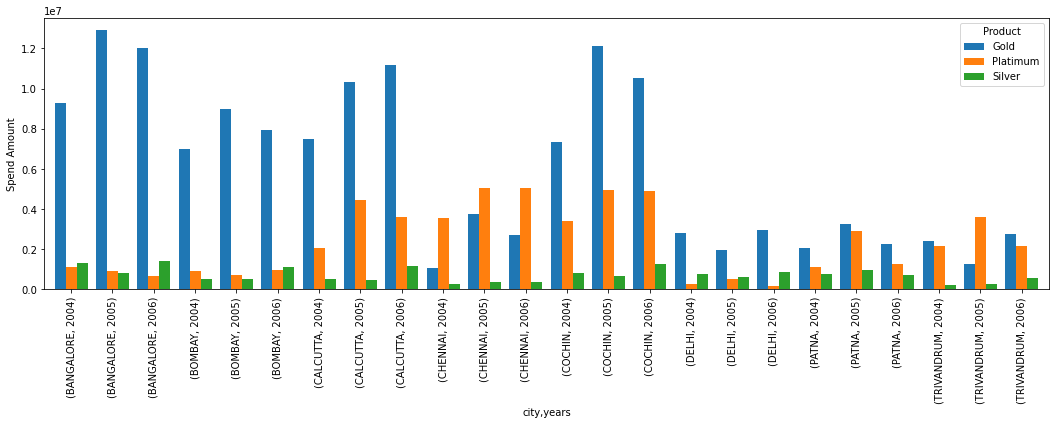

In [265]:
customer_spend_table.plot(kind='bar',figsize=(18,5),width=0.8)
plt.xlabel('city,years')
plt.ylabel("Spend Amount")
plt.show()


## 4.(a) Monthly comparison of total spends, city wise

In [266]:
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,monthly_re,yearly_re
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,January,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,January,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,January,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,January,2005


In [267]:
customer_spend.groupby(['City','monthly_re'])[['Amount']].sum()

Amount
City       monthly_re            
BANGALORE  April       4207980.48
           August       695061.95
           December     422167.24
           February    6734494.76
           January     9041796.84
...                           ...
TRIVANDRUM March       2392316.51
           May         2813534.48
           November     143387.40
           October      285581.92
           September    186063.70

[96 rows x 1 columns]

In [268]:
month_city=pd.pivot_table(data=customer_spend,values='Amount',index=['City'],columns='monthly_re',aggfunc='sum')
month_city

monthly_re,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,4207980.48,695061.95,422167.24,6734494.76,9041796.84,2228217.69,1330685.90,5362903.07,6383115.13,2260603.07,1091602.61,703018.28
BOMBAY,1873785.01,1066744.75,140040.71,4276988.30,5948993.33,177726.32,1172594.97,5227850.50,3891945.60,2872049.40,676005.70,1278402.79
CALCUTTA,3457507.95,1548354.02,55001.50,8150545.61,9064864.90,2234573.27,2293045.81,4939040.04,5578246.87,2078880.93,196357.83,1511713.57
CHENNAI,2518656.99,305875.97,223628.27,4385815.95,4466961.36,693825.77,1244242.16,3183643.71,2856199.62,1347779.28,156247.17,745759.40
COCHIN,3882744.94,2317306.61,909533.05,5747886.38,11714373.54,1290897.30,2495745.07,5645146.53,6581085.69,3127999.60,868551.89,1382242.90
DELHI,777240.75,155402.16,842342.02,1494064.06,2714261.45,50001.50,511276.09,2267149.02,1600322.07,391610.96,64615.46,50001.00
PATNA,2338179.53,419383.64,50000.00,2353333.55,4916205.55,50000.00,746186.13,1437166.61,2136586.80,413677.87,329537.34,70329.95
TRIVANDRUM,1199293.45,453773.94,640922.26,2857123.89,3704336.99,260484.50,400336.83,2392316.51,2813534.48,143387.40,285581.92,186063.70


Text(0, 0.5, 'Amount')

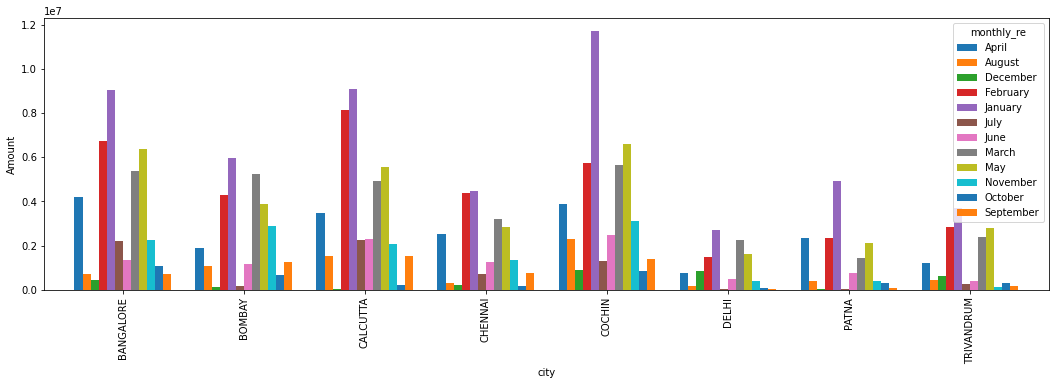

In [269]:
month_city.plot(kind='bar',figsize=(18,5),width=0.8)
plt.xlabel('city')
plt.ylabel('Amount')

##  b. Comparison of yearly spend on air tickets


In [270]:
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,monthly_re,yearly_re
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,January,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,January,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,January,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,January,2005


In [271]:
air_ticket=customer_spend.groupby(['Type','yearly_re'])[['Amount']].sum().loc['AIR TICKET']
air_ticket

,Amount
yearly_re,
2004,4357225.35
2005,10550152.21
2006,5248469.56


<AxesSubplot:xlabel='yearly_re'>

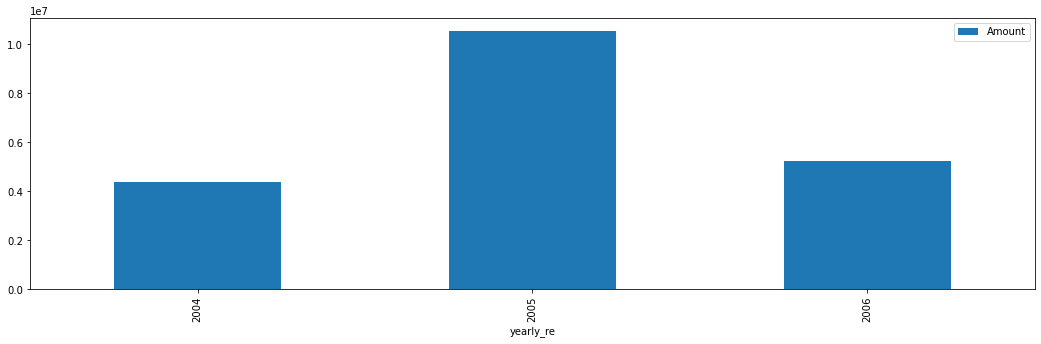

In [272]:
air_ticket.plot(kind='bar',figsize=(18,5))

## c. Comparison of monthly spend for each product (look for any seasonalitythat exists in    terms of spend)

In [273]:
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,monthly_re,yearly_re
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,January,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,January,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,January,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,January,2005


In [274]:
customer_spend_table2=customer_spend.pivot_table(values='Amount',index='monthly_re',columns='Product',aggfunc='sum')
customer_spend_table2

Product,Gold,Platimum,Silver
monthly_re,,,
April,13170572.59,5182493.86,1902322.65
August,4954030.42,1714762.80,293109.82
December,2332940.96,750156.19,200537.90
February,24779179.55,9134054.58,2087018.37
January,32413831.83,14951578.51,4206383.62
July,5167416.37,1288156.26,530153.72
June,6538862.64,2965712.71,689537.61
March,19256972.48,7288837.68,3909405.83
May,21548169.76,8151926.49,2140940.01


<AxesSubplot:xlabel='monthly_re'>

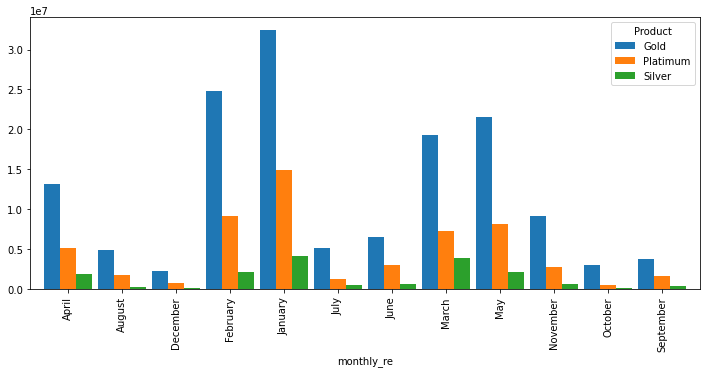

In [275]:
customer_spend_table2.plot(kind='bar',figsize=(12,5),width=0.9)

## 5. Write user defined PYTHON function to perform the following analysis:      You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers

In [276]:
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,monthly_re,yearly_re
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,January,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,January,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,January,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,January,2005


In [277]:
def summary_report(product,timeperiod):
    print('Give the product name and timeperiod for which you want the data')
    if product.lower()=='gold' and timeperiod.lower()=='monthly_re':
        pivot = customer_spend.pivot_table(index=['Product','City','Customer'],columns='monthly_re',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='gold' and timeperiod.lower()=='yearly_re':
        pivot = customer_spend.pivot_table(index=['Product','City','Customer'],columns='yearly_re',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='monthly_re':
        pivot = customer_spend.pivot_table(index=['Product','City','Customer'],columns='monthly_re',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='yearly_re':
        pivot = customer_spend.pivot_table(index=['Product','City','Customer'],columns='yearly_re',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    if product.lower()=='Platimum' and timeperiod.lower()=='monthly_re':
        pivot = customer_spend.pivot_table(index=['Product','City','Customer'],columns='monthly_re',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platimum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='Platimum' and timeperiod.lower()=='yearly_re':
        pivot = customer_spend.pivot_table(index=['Product','City','Customer'],columns='yearly_re',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platimum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    return result

In [279]:
summary_report('gold','yearly_re')

Give the product name and timeperiod for which you want the data


yearly_re                          2004        2005        2006
Product City       Customer                                    
Gold    BANGALORE  A1        2652994.00  1721875.58   767833.18
                   A13       2036019.37  3499001.99  2696585.90
                   A14       1829732.93  3563937.46  2267415.81
                   A30       1372606.61   697807.35  3052713.76
                   A43       1398525.63  2787930.11  2521332.18
                   A63              NaN   621810.50   180692.76
                   A81              NaN         NaN   175659.72
                   A88              NaN         NaN    26518.91
                   A92              NaN         NaN   341858.87
        COCHIN     A11       1204383.23  1478044.52  1834799.94
                   A16        876938.08  1438332.47  2961936.36
                   A32        841894.27  1746993.19   696520.14
                   A45       1963876.93  3418440.13  1607927.04
                   A61       1938625.46  3930624.30  3133076.63
                   A65        177417.81    98178.42         NaN
                   A90              NaN         NaN   264882.27
                   A94        312714.37         NaN         NaN
        CALCUTTA   A10        770697.27  1744737.94  1331989.44
                   A15        838548.93  1490784.44  2247238.63
                   A29       1862217.92  1364404.61  2799544.21
                   A31       1124269.93  1234098.55  1093594.68
                   A60       2881406.93  4469330.26  3670193.79
                   A89              NaN         NaN    24972.02
        BOMBAY     A12       2164238.73  4228581.52  1790230.39
                   A17       1197389.41  1755664.62  1284087.42
                   A42       2315906.71  2136049.57  2664269.46
                   A62       1310318.68   862722.57  2088605.20
                   A91              NaN         NaN    89951.84
        CHENNAI    A27        859873.72  3740945.58  2347415.89
                   A67        199744.78         NaN   356872.73
        TRIVANDRUM A28       2415102.84  1240375.85  2735710.87
        PATNA      A26       1510262.78  3089945.34  2276181.69
                   A66        321903.62   162670.43         NaN
                   A95        240401.50         NaN         NaN
        DELHI      A44       2508989.91  1496161.26  2184188.08
                   A64              NaN   468684.01   393513.71
                   A82              NaN         NaN   379401.53
                   A93        297505.09         NaN         NaN